# Maximum margin classification with support vector machines (SVM)
In SVM the goal is now to maximize the margin: the distance between the decision boundary and the training samples.
The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.
### Dependencies

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

### The display region function

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def displayDecisionRegions(X,y,classifier,resolution=0.02,test_idx=None,xlabel=None,ylabel=None,label1='1',label0='0',label2='2',title='classifier'):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('gray', 'green', 'blue', 'red', 'cyan')
    cmap = ListedColormap( colors[: len( np.unique( y))])
    # determine the min and max value for the two features used
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # build a grid array, using evenly spaced values within interval min max for each features
    xx,yy=np.meshgrid( np.arange( x_min, x_max, resolution), np.arange( y_min, y_max, resolution))
    # Predict the boundary by using a X = progressing values from x min to x max (y min, y max)
    Z = classifier.predict( np.array([ xx.ravel(), yy.ravel()]).T)
    # reshape Z as matrix
    Z = Z.reshape( xx.shape)
    # draw contour plot
    plt.contourf( xx, yy, Z, alpha = 0.4, cmap = cmap)
    plt.xlim( xx.min(), xx.max())
    plt.ylim( yy.min(), yy.max())
    # plot class samples
    for idx, cl in enumerate( np.unique( y)):
        if cl == 2:
            aclass=label2
        else:
            if cl == 0:
                aclass=label0
            else:
                aclass=label1
        plt.scatter( x = X[ y == cl, 0],
                     y = X[ y == cl, 1],
                     alpha = 0.8,
                     c = cmap( idx),
                     marker = markers[ idx],
                     label = aclass)
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidths=1,marker='o',s=55,label='Test set')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend( loc ='upper left')
    plt.show()

### Load and prepare data

In [ ]:
print("1- load iris data using datasets")
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print("2- build training set and test set \ntrain_test_split( X, y, test_size = 0.3, random_state = 0)")
# Randomly split X and y arrays into 30% test data and 70% training set
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size = 0.3, random_state = 0)
X_train.shape,y_train.shape
print('3- Standardize the training and test sets')
# standardize the features for optimal performance of gradient descent
sc=StandardScaler()
# compute mean and std deviation for each feature using fit
sc.fit(X_train)
X_train_std=sc.transform(X_train)
# Note that we used the same scaling parameters to standardize the test set so
# that both the values in the training and test dataset are comparable to each other.
X_test_std=sc.transform(X_test)

1- load iris data using datasets
2- build training set and test set 
train_test_split( X, y, test_size = 0.3, random_state = 0)
3- Standardize the training and test sets


### Fit the model
SVMs mostly care about the points that are closest to the decision boundary (support vectors). Large values of C correspond to large error penalties whereas we are less strict about misclassification errors if we choose smaller values for C. We can then we use the parameter C to control the width of the margin and therefore tune the bias-variance trade-off as.

4- fit SVM with training set: SVC(kernel='linear',C=1.0,random_state=0)
5- Display decision regions


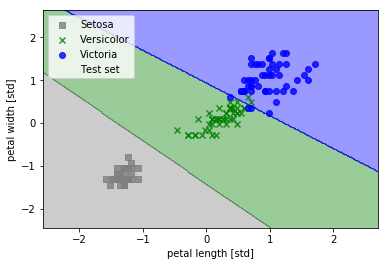

In [ ]:

print('4- fit SVM with training set: SVC(kernel=\'linear\',C=1.0,random_state=0)')
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)

print("5- Display decision regions")
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
displayDecisionRegions( X_combined_std, y_combined, classifier = svm,
                       test_idx = range( 105,150),
                       label0='Setosa',label1='Versicolor',label2='Virginica',
                        xlabel='petal length [std]', ylabel='petal width [std]')